# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [205]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
dataFrame = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
dataFrame.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [206]:
# Checking the number of mice.
numberOfMice= dataFrame['Mouse ID'].nunique()
numberOfMice

249

In [207]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouseID = dataFrame.loc[dataFrame.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicateMouseID

array(['g989'], dtype=object)

In [208]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseDataFrame = dataFrame.loc[dataFrame["Mouse ID"] == "g989", :]
duplicateMouseDataFrame

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [209]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandataFrame = dataFrame[dataFrame['Mouse ID'].isin(duplicateMouseID)==False]
cleandataFrame.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [210]:
# Checking the number of mice in the clean DataFrame.
cleanMiceCount = cleandataFrame["Mouse ID"].nunique()
cleanMiceCount


248

## Summary Statistics

In [211]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

meanNumber = cleandataFrame['Tumor Volume (mm3)'].groupby(cleandataFrame['Drug Regimen']).mean()
meadianNumber = cleandataFrame['Tumor Volume (mm3)'].groupby(cleandataFrame['Drug Regimen']).median()
varNumber = cleandataFrame['Tumor Volume (mm3)'].groupby(cleandataFrame['Drug Regimen']).var()
standardNumber = cleandataFrame['Tumor Volume (mm3)'].groupby(cleandataFrame['Drug Regimen']).std()
semNumber = cleandataFrame['Tumor Volume (mm3)'].groupby(cleandataFrame['Drug Regimen']).sem()


displaySummaryStat = pd.DataFrame({"Mean Tumor Volume":meanNumber, 
                            "Median Tumor Volume":meadianNumber, 
                           "Tumor Volume Variance":varNumber, 
                           "Tumor Volume Std. Dev.":standardNumber, 
                           "Tumor Volume Std. Err.":semNumber})
displaySummaryStat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [212]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summaryRegimen =  cleandataFrame.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summaryRegimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Oberserved Mouse Timepoints')

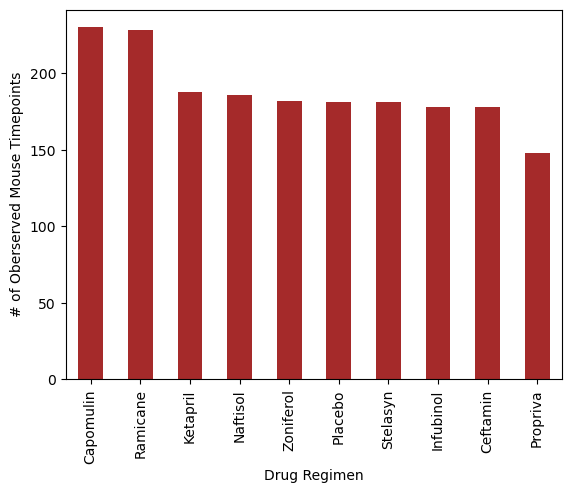

In [213]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
miceCount = cleandataFrame["Drug Regimen"].value_counts()
plotsShow = miceCount.plot.bar(color='brown')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Oberserved Mouse Timepoints")

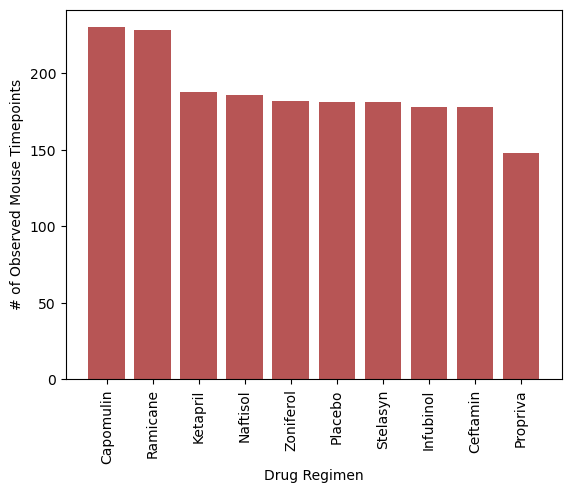

In [214]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
xAxisValue = miceCount.index.values
yAxisValue = miceCount.values
plt.bar(xAxisValue, yAxisValue, color='brown', alpha=0.8, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

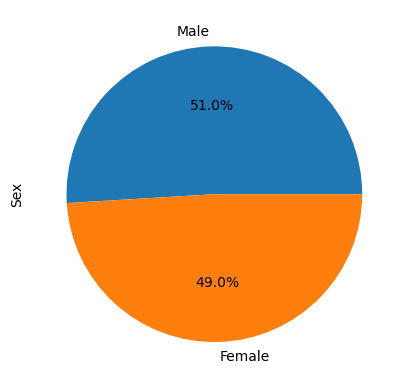

In [215]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderofMice = cleandataFrame["Sex"].value_counts()
genderofMice.plot.pie(autopct= "%1.1f%%")
plt.ylabel("Sex")
plt.show()

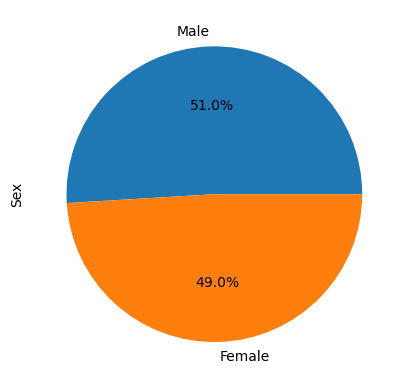

In [216]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
LabelsforGender = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = genderofMice.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [217]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
CapomulindataFrame = cleandataFrame.loc[cleandataFrame["Drug Regimen"] == "Capomulin",:]
RamicanedataFrame = cleandataFrame.loc[cleandataFrame["Drug Regimen"] == "Ramicane", :]
InfubinoldataFrame = cleandataFrame.loc[cleandataFrame["Drug Regimen"] == "Infubinol", :]
CeftamindataFrame = cleandataFrame.loc[cleandataFrame["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
CapomulinLast = CapomulindataFrame.groupby('Mouse ID').max()['Timepoint']
CapomulinVolume = pd.DataFrame(CapomulinLast)
CapomulinMergeFrame = pd.merge(CapomulinVolume, cleandataFrame, on=("Mouse ID","Timepoint"),how="left")
CapomulinMergeFrame.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
CapomulinMergeFrame = pd.merge(CapomulinVolume, cleandataFrame, on=("Mouse ID","Timepoint"),how="left")
CapomulinMergeFrame.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [218]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

lastTimePointIndex = cleandataFrame.groupby(["Mouse ID"])["Timepoint"].max()
lastTimePointIndex = lastTimePointIndex.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
MergeDataFrameTimePoint = lastTimePointIndex.merge(cleandataFrame, on=["Mouse ID", "Timepoint"], how="left")
MergeDataFrameTimePoint
TreatmentList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
totalTumerVolumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for eachTumorDrug in TreatmentList:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    foundTumerVol = MergeDataFrameTimePoint.loc[MergeDataFrameTimePoint["Drug Regimen"] == eachTumorDrug, "Tumor Volume (mm3)"]
    totalTumerVolumes.append(foundTumerVol)
    quarterTumoers = foundTumerVol.quantile([.25, .5, .75])
    lowerFound = quarterTumoers[.25]
    upperFound = quarterTumoers[.75]
    foundSubset = upperFound - lowerFound 
    
    lowerFoundVol = lowerFound - (1.5*foundSubset)
    upperFoundVol = upperFound + (1.5*foundSubset)
    outLiersFound = foundTumerVol.loc[(foundTumerVol < lowerFoundVol) | (foundTumerVol > upperFoundVol)]
    print(f"For {eachTumorDrug}, the outliers are: {outLiersFound}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


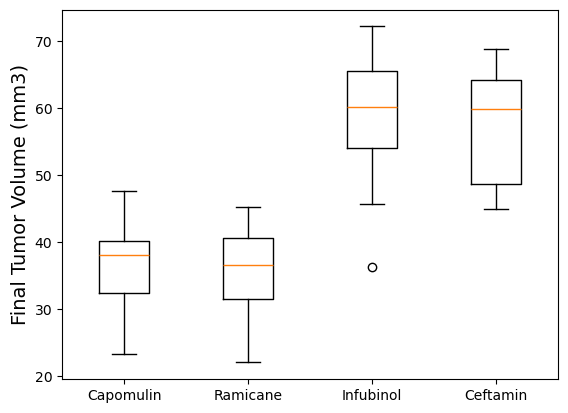

In [219]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
distVolumy1, treatmentx1 = plt.subplots()
treatmentx1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
treatmentx1.boxplot(totalTumerVolumes, labels=TreatmentList, widths = 0.4, vert=True)

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

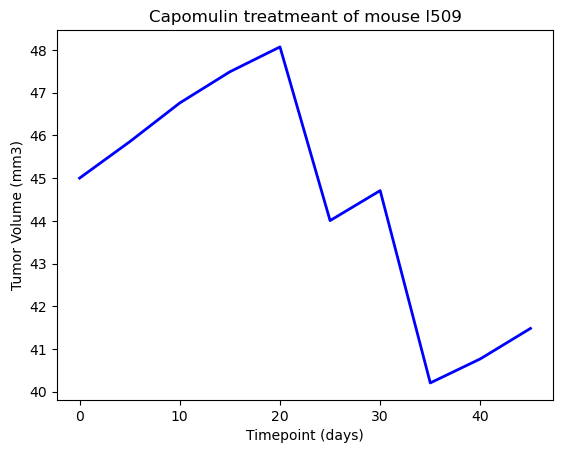

In [220]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulindataFrame = cleandataFrame.loc[cleandataFrame["Drug Regimen"] == "Capomulin",:]
capomulindataFrame

# find required value if it is case sensitive
unique_values = capomulindataFrame['Mouse ID'].unique()
unique_values

mounceinGivenID = capomulindataFrame.loc[capomulindataFrame["Mouse ID"] == "l509",:]
mounceinGivenID

timePointLabel = mounceinGivenID["Timepoint"]
tumerMM3Volume = mounceinGivenID["Tumor Volume (mm3)"]

distVolumy1, treatmentx1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(timePointLabel, tumerMM3Volume,linewidth=2, markersize=15,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object


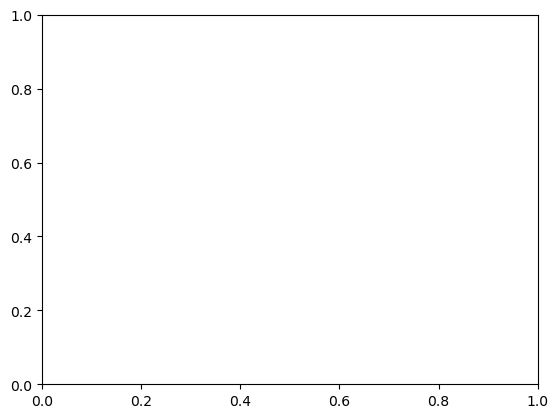

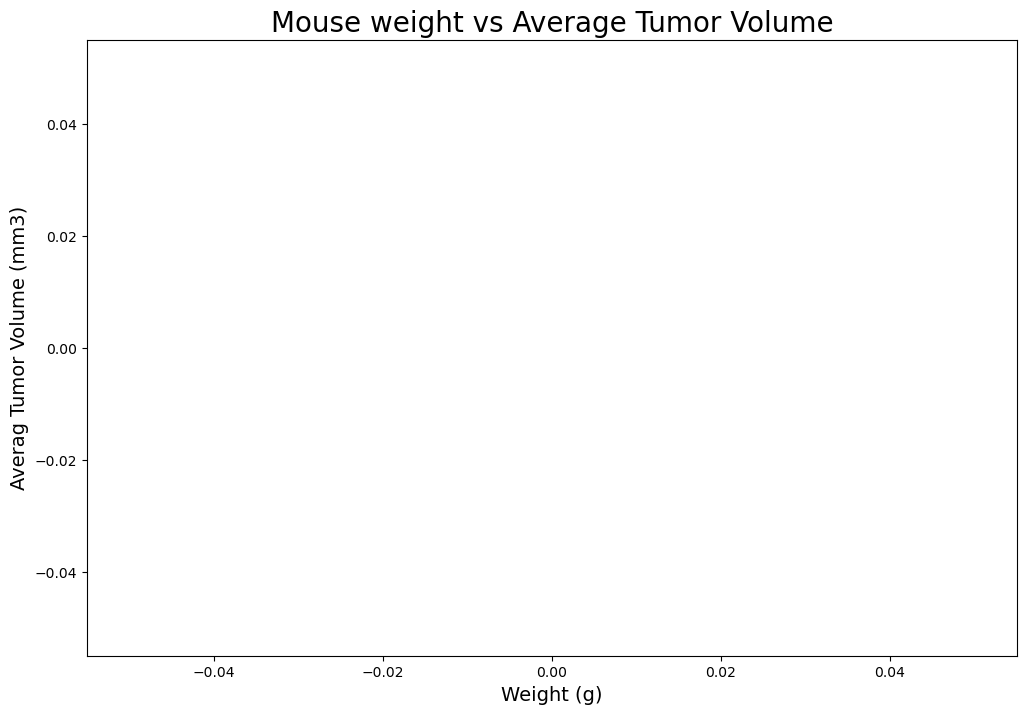

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [225]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
CapomulindataFrame2 = cleandataFrame.loc[cleandataFrame["Drug Regimen"] == "Capomulin",:]
CapomulindataFrame2.head()
print(CapomulindataFrame2.dtypes)
numbericdataFrame = CapomulindataFrame2.apply(pd.to_numeric, errors='coerce')
numbericdataFrame.head()
averageCapomulinData = numbericdataFrame.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(12, 8))
marker_size=14
plt.scatter(averageCapomulinData['Weight (g)'],averageCapomulinData['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Mouse weight vs Average Tumor Volume",fontsize =20)
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Averag Tumor Volume (mm3)",fontsize =14)
plt.show()
CapomulindataFrame2.head()

## Correlation and Regression

In [227]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
CorrelationFound = round(st.pearsonr(averageCapomulinData['Weight (g)'],averageCapomulinData['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {CorrelationFound}")

x1, y1 = plt.subplots()
plt.scatter(averageCapomulinData['Weight (g)'],averageCapomulinData['Tumor Volume (mm3)'],s=90, color="blue")
plt.xlabel("Weight (g)", fontsize = 14)
plt.ylabel("Averag Tumor Volume (mm3)", fontsize = 14)

plt.show()
CapomulindataFrame2.head()

ValueError: x and y must have length at least 2.